<a href="https://colab.research.google.com/github/filipefreitas011/accsadml43-grupo2-cenario1/blob/main/Dengue1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('dengue_sinan.csv')
df['ID'] = df.index
df = df.reindex(columns=['ID']+ df.columns.tolist())

<ipython-input-3-fbbddb76e1b6>:1: DtypeWarning: Columns (30,31,53,54,55,59,61,63,65,71,83,89,100,116,131,137) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('dengue_sinan.csv')


In [4]:
df.head()

,ID,NU_NOTIFIC,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,...,DT_TRANSRS,DT_TRANSSE,NU_LOTE_V,NU_LOTE_H,CS_FLXRET,FLXRECEBI,IDENT_MICR,MIGRADO_W,ID_CNS_SUS_HASHED,ID
0,0,158,2,A90,2016-03-05,201609,2016,29,292210,1381.0,...,NaN,NaN,NaN,NaN,0.0,NaN,4.0,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,0
1,1,298,2,A90,2016-02-15,201607,2016,29,293290,1385.0,...,NaN,NaN,NaN,NaN,0.0,NaN,4.0,NaN,ebc774c2fc9be73f8d403772dc14539dbe6e448e117f62...,1
2,2,5082,2,A90,2016-03-25,201612,2016,29,293250,1385.0,...,NaN,NaN,NaN,NaN,1.0,NaN,4.0,NaN,e0f037bc45eeea73df919230256055724a0bc45b990d62...,2
3,3,111262,2,A90,2016-03-24,201612,2016,29,291360,1385.0,...,NaN,NaN,NaN,NaN,0.0,NaN,4.0,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3
4,4,166,2,A90,2016-03-13,201611,2016,29,292210,1381.0,...,NaN,NaN,NaN,NaN,0.0,NaN,4.0,NaN,595d3ab2cc2bfc76ee1e9ef090ac6abf0e7b64aee90e92...,4


In [5]:
duplicatas = df.duplicated()
numero_duplicatas = duplicatas.sum()
linhas_duplicadas = df[duplicatas]
print(f"Número de linhas duplicadas: {numero_duplicatas}")
print(linhas_duplicadas)

Número de linhas duplicadas: 0
Empty DataFrame
Columns: [ID, NU_NOTIFIC, TP_NOT, ID_AGRAVO, DT_NOTIFIC, SEM_NOT, NU_ANO, SG_UF_NOT, ID_MUNICIP, ID_REGIONA, ID_UNIDADE, DT_SIN_PRI, SEM_PRI, SOUNDEX, NU_IDADE_N, CS_SEXO, CS_GESTANT, CS_RACA, CS_ESCOL_N, SG_UF, ID_MN_RESI, ID_RG_RESI, ID_DISTRIT, ID_BAIRRO, NM_BAIRRO, ID_LOGRADO, ID_GEO1, ID_GEO2, NM_REFEREN, CS_ZONA, ID_PAIS, DT_INVEST, ID_OCUPA_N, FEBRE, MIALGIA, CEFALEIA, EXANTEMA, VOMITO, NAUSEA, DOR_COSTAS, CONJUNTVIT, ARTRITE, ARTRALGIA, PETEQUIA_N, LEUCOPENIA, LACO, DOR_RETRO, DIABETES, HEMATOLOG, HEPATOPAT, RENAL, HIPERTENSA, ACIDO_PEPT, AUTO_IMUNE, DT_CHIK_S1, DT_CHIK_S2, DT_PRNT, RES_CHIKS1, RES_CHIKS2, RESUL_PRNT, DT_SORO, RESUL_SORO, DT_NS1, RESUL_NS1, DT_VIRAL, RESUL_VI_N, DT_PCR, RESUL_PCR_, SOROTIPO, HISTOPA_N, IMUNOH_N, HOSPITALIZ, DT_INTERNA, UF, MUNICIPIO, HOSPITAL, DDD_HOSP, TEL_HOSP, TPAUTOCTO, COUFINF, COPAISINF, COMUNINF, CODISINF, CO_BAINF, NOBAIINF, CLASSI_FIN, CRITERIO, DOENCA_TRA, CLINC_CHIK, EVOLUCAO, DT_OBITO, 

In [6]:
print("1 – Negativa 2 – Individual 3 – Surto 4 – Agregado")
print(df['TP_NOT'].value_counts())
print("Null =", df['TP_NOT'].isnull().sum()/df.shape[0]*100)
print("------------------------")
print("1. 1º Trimestre  2. 2º Trimestre  3. 3º Trimestre  4, 5, 6, 9 Id gest.ignorada")
print(df['CS_GESTANT'].value_counts())
print("Null =", df['CS_GESTANT'].isnull().sum()/df.shape[0]*100)
print("------------------------")
print("1-branca 2-preta 3-amarela 4-parda 5-indígena 9-Ignorado")
print(df['CS_RACA'].value_counts())
print("Null =", df['CS_RACA'].isnull().sum()/df.shape[0]*100)
print("------------------------")
print("M- Masculino F- Feminino I- Ignorado")
print(df['CS_SEXO'].value_counts())
print("Null =", df['CS_SEXO'].isnull().sum()/df.shape[0]*100)
print("------------------------")
print(df['FEBRE'].value_counts())
print("Null =", df['FEBRE'].isnull().sum()/df.shape[0]*100)
print("------------------------")
print(df['MIALGIA'].value_counts())
print("Null =", df['MIALGIA'].isnull().sum()/df.shape[0]*100)
print("------------------------")
print(df['CEFALEIA'].value_counts())
print("Null =", df['CEFALEIA'].isnull().sum()/df.shape[0]*100)
print("------------------------")
print(df['EXANTEMA'].value_counts())
print("Null =", df['EXANTEMA'].isnull().sum()/df.shape[0]*100)
print("------------------------")
print(df['VOMITO'].value_counts())
print("Null =", df['VOMITO'].isnull().sum()/df.shape[0]*100)
print("------------------------")
print(df['NAUSEA'].value_counts())
print("Null =", df['NAUSEA'].isnull().sum()/df.shape[0]*100)
print("------------------------")
print(df['DOR_COSTAS'].value_counts())
print("Null =", df['DOR_COSTAS'].isnull().sum()/df.shape[0]*100)
print("------------------------")
print(df['CONJUNTVIT'].value_counts())
print("Null =", df['CONJUNTVIT'].isnull().sum()/df.shape[0]*100)
print("------------------------")
print(df['ARTRITE'].value_counts())
print("Null =", df['ARTRITE'].isnull().sum()/df.shape[0]*100)
print("------------------------")
print(df['ARTRALGIA'].value_counts())
print("Null =", df['ARTRALGIA'].isnull().sum()/df.shape[0]*100)
print("------------------------")
print(df['PETEQUIA_N'].value_counts())
print("Null =", df['PETEQUIA_N'].isnull().sum()/df.shape[0]*100)
print("------------------------")
print(df['LEUCOPENIA'].value_counts())
print("Null =", df['LEUCOPENIA'].isnull().sum()/df.shape[0]*100)
print("------------------------")
print(df['LACO'].value_counts())
print("Null =", df['LACO'].isnull().sum()/df.shape[0]*100)
print("------------------------")
print(df['DOR_RETRO'].value_counts())
print("Null =", df['DOR_RETRO'].isnull().sum()/df.shape[0]*100)
print("------------------------")
print(df['DIABETES'].value_counts())
print("Null =", df['DIABETES'].isnull().sum()/df.shape[0]*100)
print("------------------------")
print(df['HEMATOLOG'].value_counts())
print("Null =", df['HEMATOLOG'].isnull().sum()/df.shape[0]*100)
print("------------------------")
print(df['HEPATOPAT'].value_counts())
print("Null =", df['HEPATOPAT'].isnull().sum()/df.shape[0]*100)
print("------------------------")
print(df['RENAL'].value_counts())
print("Null =", df['RENAL'].isnull().sum()/df.shape[0]*100)
print("------------------------")
print(df['HIPERTENSA'].value_counts())
print("Null =", df['HIPERTENSA'].isnull().sum()/df.shape[0]*100)
print("------------------------")
print(df['ACIDO_PEPT'].value_counts())
print("Null =", df['ACIDO_PEPT'].isnull().sum()/df.shape[0]*100)
print("------------------------")
print(df['AUTO_IMUNE'].value_counts())
print("Null =", df['AUTO_IMUNE'].isnull().sum()/df.shape[0]*100)
print("------------------------")
print(df['RESUL_SORO'].value_counts())
print("Null =", df['RESUL_SORO'].isnull().sum()/df.shape[0]*100)
print("------------------------")
print("1-Reagente 2-Não Reagente 3-Inconclusivo 4-Não realizado")
print(df['RESUL_NS1'].value_counts())
print("Null =", df['RESUL_NS1'].isnull().sum()/df.shape[0]*100)
print("------------------------")
print("1-Reagente 2-Não Reagente 3-Inconclusivo 4-Não realizado")
print(df['RESUL_VI_N'].value_counts())
print("Null =", df['RESUL_VI_N'].isnull().sum()/df.shape[0]*100)
print("------------------------")
print("1-Reagente 2-Não Reagente 3-Inconclusivo 4-Não realizado")
print(df['RESUL_PCR_'].value_counts())
print("Null =", df['RESUL_PCR_'].isnull().sum()/df.shape[0]*100)
print("------------------------")
print("1-Positivo 2-Negativo 3-Inconclusivo 4-Não realizado")
print(df['HISTOPA_N'].value_counts())
print("Null =", df['HISTOPA_N'].isnull().sum()/df.shape[0]*100)
print("------------------------")
print("1-Positivo 2-Negativo 3-Inconclusivo 4-Não realizado")
print(df['IMUNOH_N'].value_counts())
print("Null =", df['IMUNOH_N'].isnull().sum()/df.shape[0]*100)
print("------------------------")
print("1-Sim 2-Não 9-Ignorado")
print(df['HOSPITALIZ'].value_counts())
print("Null =", df['HOSPITALIZ'].isnull().sum()/df.shape[0]*100)
print("------------------------")
print("1 - Sim  2 – Não  3 – Indeterminado")
print(df['TPAUTOCTO'].value_counts())
print("Null =", df['TPAUTOCTO'].isnull().sum()/df.shape[0]*100)
print("------------------------")
print("5-Descartado 10-Dengue 11-Dengue com sinais de alarme 12-Dengue grave 13-Chikungunya")
print(df['CLASSI_FIN'].value_counts())
print("Null =", df['CLASSI_FIN'].isnull().sum()/df.shape[0]*100)
print("------------------------")
print("1-Laboratório 2-Clínico Epidemiológico 3-Em investigação")
print(df['CRITERIO'].value_counts())
print("Null =", df['CRITERIO'].isnull().sum()/df.shape[0]*100)
print("------------------------")
print("1- cura 2- óbito pelo agravo 3- óbito por outras causas 4- óbito em investigação 9- ignorado")
print(df['EVOLUCAO'].value_counts())
print("Null =", df['EVOLUCAO'].isnull().sum()/df.shape[0]*100)
print("------------------------")
print("1.urbana 2.rural 3.periurbana 9.ignorado")
print(df['CS_ZONA'].value_counts())
print("Null =", df['CS_ZONA'].isnull().sum()/df.shape[0]*100)
print("------------------------")
print("1 – Sim  2 – Não")
print(df['ALRM_VOM'].value_counts())
print("Null =", df['ALRM_VOM'].isnull().sum()/df.shape[0]*100)
print("------------------------")
print("1 – Sim  2 – Não")
print(df['ALRM_SANG'].value_counts())
print("Null =", df['ALRM_SANG'].isnull().sum()/df.shape[0]*100)
print("------------------------")
print("1 – Sim  2 – Não")
print(df['ALRM_HEPAT'].value_counts())
print("Null =", df['ALRM_HEPAT'].isnull().sum()/df.shape[0]*100)
print("------------------------")



1 – Negativa 2 – Individual 3 – Surto 4 – Agregado
TP_NOT
2    620209
3         2
Name: count, dtype: int64
Null = 0.0
------------------------
1. 1º Trimestre  2. 2º Trimestre  3. 3º Trimestre  4, 5, 6, 9 Id gest.ignorada
CS_GESTANT
6.0    366988
5.0    171381
9.0     74444
2.0      2371
3.0      2104
1.0      1544
4.0      1244
Name: count, dtype: int64
Null = 0.0217667858196646
------------------------
1-branca 2-preta 3-amarela 4-parda 5-indígena 9-Ignorado
CS_RACA
4.0    335462
9.0    172355
1.0     53716
2.0     43281
3.0      4801
5.0      2064
Name: count, dtype: int64
Null = 1.3756608638028027
------------------------
M- Masculino F- Feminino I- Ignorado
CS_SEXO
F    350069
M    268687
I      1397
Name: count, dtype: int64
Null = 0.009351656129929975
------------------------
FEBRE
1.0    465118
2.0     75670
Name: count, dtype: int64
Null = 12.805803186334973
------------------------
MIALGIA
1.0    397948
2.0    142840
Name: count, dtype: int64
Null = 12.805803186334973
------

In [7]:
print(df['NU_NOTIFIC'].value_counts())
print("Null =", df['NU_NOTIFIC'].isnull().sum()/df.shape[0]*100)
print("------------------------")

NU_NOTIFIC
1         707
2         656
3         608
4         596
5         568
         ... 
105859      1
147946      1
181336      1
104254      1
249407      1
Name: count, Length: 185124, dtype: int64
Null = 0.0
------------------------


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620211 entries, 0 to 620210
Columns: 150 entries, ID to ID
dtypes: float64(115), int64(10), object(25)
memory usage: 709.8+ MB


In [9]:
pd.set_option('display.max_rows', None)
porcentagem_nulos = df.isnull().sum()/df.shape[0]*100
porcentagem_nulos.sort_values(ascending=False)

DT_TRANSUS           100.000000
EVIDENCIA            100.000000
DT_TRANSDM           100.000000
MIGRADO_W            100.000000
DT_TRANSRM           100.000000
FLXRECEBI            100.000000
DT_TRANSRS           100.000000
NU_LOTE_H            100.000000
SOUNDEX              100.000000
CON_FHD              100.000000
DT_TRANSSE           100.000000
GENGIVO               99.999678
METRO                 99.999678
HEMATURA              99.999678
EPISTAXE              99.999678
DT_TRANSSM            99.999678
PETEQUIAS             99.999678
ID_LOGRADO            99.999678
SANGRAM               99.999678
PLAQ_MENOR            99.999678
NU_LOTE_V             99.999678
COMPLICA              99.999678
NU_LOTE_I             99.999678
LACO_N                99.999678
PLASMATICO            99.999516
MANI_HEMOR            99.999194
ID_GEO2               99.997420
DT_CHIK_S2            99.996453
ID_GEO1               99.989197
NDUPLIC_N             99.981297
DT_PRNT               99.941472
DT_GRAV 

In [10]:
df.drop('DT_TRANSUS', axis=1, inplace=True)
df.drop('DT_TRANSDM', axis=1, inplace=True)
df.drop('MIGRADO_W', axis=1, inplace=True)
df.drop('DT_TRANSRM', axis=1, inplace=True)
df.drop('FLXRECEBI', axis=1, inplace=True)
df.drop('DT_TRANSRS', axis=1, inplace=True)
df.drop('NU_LOTE_H', axis=1, inplace=True)
df.drop('CON_FHD', axis=1, inplace=True)
df.drop('DT_TRANSSE', axis=1, inplace=True)
df.drop('GENGIVO', axis=1, inplace=True)
df.drop('METRO', axis=1, inplace=True)
df.drop('HEMATURA', axis=1, inplace=True)
df.drop('EPISTAXE', axis=1, inplace=True)
df.drop('DT_TRANSSM', axis=1, inplace=True)
df.drop('PETEQUIAS', axis=1, inplace=True)
df.drop('ID_LOGRADO', axis=1, inplace=True)
df.drop('SANGRAM', axis=1, inplace=True)
df.drop('PLAQ_MENOR', axis=1, inplace=True)

In [11]:
df.drop('NU_LOTE_I', axis=1, inplace=True)
df.drop('COMPLICA', axis=1, inplace=True)
df.drop('LACO_N', axis=1, inplace=True)
df.drop('PLASMATICO', axis=1, inplace=True)
df.drop('MANI_HEMOR', axis=1, inplace=True)
df.drop('ID_GEO2', axis=1, inplace=True)
df.drop('DT_CHIK_S2', axis=1, inplace=True)
df.drop('ID_GEO1', axis=1, inplace=True)
df.drop('NDUPLIC_N', axis=1, inplace=True)
df.drop('DT_PRNT', axis=1, inplace=True)
df.drop('DT_GRAV', axis=1, inplace=True)
df.drop('GRAV_AST', axis=1, inplace=True)
df.drop('GRAV_MIOC', axis=1, inplace=True)
df.drop('GRAV_SANG', axis=1, inplace=True)
df.drop('GRAV_ORGAO', axis=1, inplace=True)
df.drop('GRAV_INSUF', axis=1, inplace=True)
df.drop('GRAV_METRO', axis=1, inplace=True)
df.drop('GRAV_PULSO', axis=1, inplace=True)
df.drop('GRAV_HIPOT', axis=1, inplace=True)

In [12]:
df.drop('GRAV_HEMAT', axis=1, inplace=True)
df.drop('GRAV_ENCH', axis=1, inplace=True)
df.drop('GRAV_CONV', axis=1, inplace=True)
df.drop('GRAV_CONSC', axis=1, inplace=True)
df.drop('GRAV_TAQUI', axis=1, inplace=True)
df.drop('GRAV_EXTRE', axis=1, inplace=True)
df.drop('GRAV_MELEN', axis=1, inplace=True)
df.drop('DT_OBITO', axis=1, inplace=True)
df.drop('DT_VIRAL', axis=1, inplace=True)
df.drop('DT_CHIK_S1', axis=1, inplace=True)
df.drop('DOENCA_TRA', axis=1, inplace=True)
df.drop('SOROTIPO', axis=1, inplace=True)
df.drop('RES_CHIKS2', axis=1, inplace=True)
df.drop('RESUL_PRNT', axis=1, inplace=True)
df.drop('CODISINF', axis=1, inplace=True)
df.drop('RES_CHIKS1', axis=1, inplace=True)
df.drop('DT_ALRM', axis=1, inplace=True)
df.drop('ALRM_ABDOM', axis=1, inplace=True)
df.drop('CLINC_CHIK', axis=1, inplace=True)
df.drop('DT_PCR', axis=1, inplace=True)
df.drop('HOSPITAL', axis=1, inplace=True)

In [13]:
df.drop('DT_INTERNA', axis=1, inplace=True)
df.drop('UF', axis=1, inplace=True)
df.drop('NM_REFEREN', axis=1, inplace=True)
df.drop('DT_NS1', axis=1, inplace=True)
df.drop('CO_BAINF', axis=1, inplace=True)
df.drop('NOBAIINF', axis=1, inplace=True)
df.drop('ID_DISTRIT', axis=1, inplace=True)
df.drop('ID_OCUPA_N', axis=1, inplace=True)
df.drop('DT_SORO', axis=1, inplace=True)
df.drop('NU_LOTE_V', axis=1, inplace=True)
df.drop('ID_AGRAVO', axis=1, inplace=True)
df.drop('DT_NOTIFIC', axis=1, inplace=True)
df.drop('DT_SIN_PRI', axis=1, inplace=True)
df.drop('NM_BAIRRO', axis=1, inplace=True)
df.drop('DT_INVEST', axis=1, inplace=True)
df.drop('DT_ENCERRA', axis=1, inplace=True)
df.drop('DS_OBS', axis=1, inplace=True)
df.drop('DT_DIGITA', axis=1, inplace=True)
df.drop('ID_CNS_SUS_HASHED', axis=1, inplace=True)
df.drop('ID', axis=1, inplace=True)
df.drop('NU_ANO', axis=1, inplace=True)
df.drop('SG_UF_NOT', axis=1, inplace=True)
df.drop('ID_MUNICIP', axis=1, inplace=True)
df.drop('ID_REGIONA', axis=1, inplace=True)
df.drop('ID_UNIDADE', axis=1, inplace=True)
df.drop('SOUNDEX', axis=1, inplace=True)
df.drop('NU_IDADE_N', axis=1, inplace=True)
df.drop('SG_UF', axis=1, inplace=True)
df.drop('ID_PAIS', axis=1, inplace=True)
df.drop('ID_MN_RESI', axis=1, inplace=True)
df.drop('ID_BAIRRO', axis=1, inplace=True)
df.drop('TEL_HOSP', axis=1, inplace=True)
df.drop('DDD_HOSP', axis=1, inplace=True)

In [14]:
df.drop('ID_RG_RESI', axis=1, inplace=True)
df.drop('IDENT_MICR', axis=1, inplace=True)
df.drop('CS_FLXRET', axis=1, inplace=True)
df.drop('CS_ESCOL_N', axis=1, inplace=True)
df.drop('EVIDENCIA', axis=1, inplace=True)
df.drop('TP_SISTEMA', axis=1, inplace=True)
df.drop('MUNICIPIO', axis=1, inplace=True)
df.drop('COUFINF', axis=1, inplace=True)
df.drop('COPAISINF', axis=1, inplace=True)
df.drop('COMUNINF', axis=1, inplace=True)

In [15]:
df.head(20)

,NU_NOTIFIC,TP_NOT,SEM_NOT,SEM_PRI,CS_SEXO,CS_GESTANT,CS_RACA,CS_ZONA,FEBRE,MIALGIA,...,CRITERIO,EVOLUCAO,ALRM_HIPOT,ALRM_PLAQ,ALRM_VOM,ALRM_SANG,ALRM_HEMAT,ALRM_LETAR,ALRM_HEPAT,ALRM_LIQ
0,158,2,201609,201609,M,6.0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,298,2,201607,201607,M,6.0,4.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5082,2,201612,201612,F,5.0,4.0,1.0,2.0,1.0,...,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,111262,2,201612,201612,F,6.0,1.0,1.0,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,166,2,201611,201610,F,6.0,4.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,22144,2,201626,201610,F,5.0,4.0,1.0,2.0,2.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,501,2,201610,201609,F,5.0,4.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,91467,2,201611,201611,M,6.0,NaN,1.0,NaN,NaN,...,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,80216,2,201552,201552,F,6.0,4.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,12379,2,201601,201601,M,6.0,4.0,2.0,1.0,1.0,...,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620211 entries, 0 to 620210
Data columns (total 48 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   NU_NOTIFIC  620211 non-null  int64  
 1   TP_NOT      620211 non-null  int64  
 2   SEM_NOT     620211 non-null  int64  
 3   SEM_PRI     620211 non-null  int64  
 4   CS_SEXO     620153 non-null  object 
 5   CS_GESTANT  620076 non-null  float64
 6   CS_RACA     611679 non-null  float64
 7   CS_ZONA     560648 non-null  float64
 8   FEBRE       540788 non-null  float64
 9   MIALGIA     540788 non-null  float64
 10  CEFALEIA    540788 non-null  float64
 11  EXANTEMA    540788 non-null  float64
 12  VOMITO      540788 non-null  float64
 13  NAUSEA      540788 non-null  float64
 14  DOR_COSTAS  540788 non-null  float64
 15  CONJUNTVIT  540788 non-null  float64
 16  ARTRITE     540788 non-null  float64
 17  ARTRALGIA   540788 non-null  float64
 18  PETEQUIA_N  540788 non-null  float64
 19  LE

In [18]:
df['CS_GESTANT'].replace(np.nan, 9.0, inplace=True)
df['CS_RACA'].replace(np.nan, 9.0, inplace=True)
df['CS_SEXO'].replace(np.nan, 'I', inplace=True)
df['FEBRE'].replace(np.nan, 3.0, inplace=True)
df['MIALGIA'].replace(np.nan, 3.0, inplace=True)
df['CEFALEIA'].replace(np.nan, 3.0, inplace=True)
df['EXANTEMA'].replace(np.nan, 3.0, inplace=True)
df['VOMITO'].replace(np.nan, 3.0, inplace=True)
df['NAUSEA'].replace(np.nan, 3.0, inplace=True)
df['DOR_COSTAS'].replace(np.nan, 3.0, inplace=True)
df['CONJUNTVIT'].replace(np.nan, 3.0, inplace=True)
df['ARTRITE'].replace(np.nan, 3.0, inplace=True)
df['ARTRALGIA'].replace(np.nan, 3.0, inplace=True)
df['PETEQUIA_N'].replace(np.nan, 3.0, inplace=True)
df['LEUCOPENIA'].replace(np.nan, 3.0, inplace=True)
df['LACO'].replace(np.nan, 3.0, inplace=True)
df['DOR_RETRO'].replace(np.nan, 3.0, inplace=True)
df['DIABETES'].replace(np.nan, 3.0, inplace=True)
df['HEMATOLOG'].replace(np.nan, 3.0, inplace=True)
df['HEPATOPAT'].replace(np.nan, 3.0, inplace=True)
df['RENAL'].replace(np.nan, 3.0, inplace=True)
df['HIPERTENSA'].replace(np.nan, 3.0, inplace=True)
df['ACIDO_PEPT'].replace(np.nan, 3.0, inplace=True)
df['AUTO_IMUNE'].replace(np.nan, 3.0, inplace=True)
df['RESUL_SORO'].replace(np.nan, 4.0, inplace=True)
df['RESUL_NS1'].replace(np.nan, 4.0, inplace=True)
df['RESUL_VI_N'].replace(np.nan, 4.0, inplace=True)
df['RESUL_PCR_'].replace(np.nan, 4.0, inplace=True)
df['HISTOPA_N'].replace(np.nan, 4.0, inplace=True)
df['IMUNOH_N'].replace(np.nan, 4.0, inplace=True)
df['HOSPITALIZ'].replace(np.nan, 9.0, inplace=True)
df['TPAUTOCTO'].replace(np.nan, 3.0, inplace=True)
df['EVOLUCAO'].replace(np.nan, 9.0, inplace=True)
df['CRITERIO'].replace(np.nan, 3, inplace=True)
df['CS_ZONA'].replace(np.nan, 9.0, inplace=True)

In [19]:
df['ALRM_HIPOT'].replace(np.nan, 3, inplace=True)
df['ALRM_PLAQ'].replace(np.nan, 3, inplace=True)
df['ALRM_VOM'].replace(np.nan, 3, inplace=True)
df['ALRM_SANG'].replace(np.nan, 3, inplace=True)
df['ALRM_HEMAT'].replace(np.nan, 3, inplace=True)
df['ALRM_LETAR'].replace(np.nan, 3, inplace=True)
df['ALRM_HEPAT'].replace(np.nan, 3, inplace=True)
df['ALRM_LIQ'].replace(np.nan, 3, inplace=True)
df['CLASSI_FIN'].replace(np.nan, 5.0, inplace=True)

In [20]:
df.isnull().sum()

NU_NOTIFIC    0
TP_NOT        0
SEM_NOT       0
SEM_PRI       0
CS_SEXO       0
CS_GESTANT    0
CS_RACA       0
CS_ZONA       0
FEBRE         0
MIALGIA       0
CEFALEIA      0
EXANTEMA      0
VOMITO        0
NAUSEA        0
DOR_COSTAS    0
CONJUNTVIT    0
ARTRITE       0
ARTRALGIA     0
PETEQUIA_N    0
LEUCOPENIA    0
LACO          0
DOR_RETRO     0
DIABETES      0
HEMATOLOG     0
HEPATOPAT     0
RENAL         0
HIPERTENSA    0
ACIDO_PEPT    0
AUTO_IMUNE    0
RESUL_SORO    0
RESUL_NS1     0
RESUL_VI_N    0
RESUL_PCR_    0
HISTOPA_N     0
IMUNOH_N      0
HOSPITALIZ    0
TPAUTOCTO     0
CLASSI_FIN    0
CRITERIO      0
EVOLUCAO      0
ALRM_HIPOT    0
ALRM_PLAQ     0
ALRM_VOM      0
ALRM_SANG     0
ALRM_HEMAT    0
ALRM_LETAR    0
ALRM_HEPAT    0
ALRM_LIQ      0
dtype: int64

In [21]:
df.head()

,NU_NOTIFIC,TP_NOT,SEM_NOT,SEM_PRI,CS_SEXO,CS_GESTANT,CS_RACA,CS_ZONA,FEBRE,MIALGIA,...,CRITERIO,EVOLUCAO,ALRM_HIPOT,ALRM_PLAQ,ALRM_VOM,ALRM_SANG,ALRM_HEMAT,ALRM_LETAR,ALRM_HEPAT,ALRM_LIQ
0,158,2,201609,201609,M,6.0,9.0,1.0,3.0,3.0,...,3.0,9.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
1,298,2,201607,201607,M,6.0,4.0,1.0,3.0,3.0,...,3.0,9.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2,5082,2,201612,201612,F,5.0,4.0,1.0,2.0,1.0,...,2.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
3,111262,2,201612,201612,F,6.0,1.0,1.0,3.0,3.0,...,2.0,9.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
4,166,2,201611,201610,F,6.0,4.0,1.0,3.0,3.0,...,3.0,9.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0


In [22]:
df.shape

(620211, 48)

In [23]:
df.describe()

,NU_NOTIFIC,TP_NOT,SEM_NOT,SEM_PRI,CS_GESTANT,CS_RACA,CS_ZONA,FEBRE,MIALGIA,CEFALEIA,...,CRITERIO,EVOLUCAO,ALRM_HIPOT,ALRM_PLAQ,ALRM_VOM,ALRM_SANG,ALRM_HEMAT,ALRM_LETAR,ALRM_HEPAT,ALRM_LIQ
count,6.202110e+05,620211.000000,620211.000000,620211.000000,620211.000000,620211.000000,620211.000000,620211.000000,620211.000000,620211.000000,...,620211.000000,620211.000000,620211.000000,620211.000000,620211.000000,620211.000000,620211.000000,620211.000000,620211.000000,620211.000000
mean,1.635363e+05,2.000003,202089.455401,202075.828657,6.042489,5.054460,1.994029,1.378123,1.486425,1.462412,...,2.150036,4.855607,2.986526,2.982941,2.985545,2.985086,2.987648,2.986787,2.988094,2.987828
std,5.592750e+05,0.001796,267.587171,528.878688,1.232360,2.692427,2.394446,0.700901,0.711289,0.710425,...,0.795511,3.995494,0.128997,0.164816,0.139685,0.144354,0.115644,0.125963,0.109777,0.113226
min,0.000000e+00,2.000000,201552.000000,20211.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,7.880000e+02,2.000000,201922.000000,201921.000000,5.000000,4.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,1.200500e+04,2.000000,202106.000000,202105.000000,6.000000,4.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,6.291650e+04,2.000000,202330.000000,202328.000000,6.000000,9.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,9.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
max,9.994664e+06,3.000000,202414.000000,202414.000000,9.000000,9.000000,9.000000,3.000000,3.000000,3.000000,...,3.000000,9.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


In [24]:
import seaborn as sns

In [37]:
df1 = df.iloc[:, [0, 2, 3]]
df1.head()

,NU_NOTIFIC,SEM_NOT,SEM_PRI
0,158,201609,201609
1,298,201607,201607
2,5082,201612,201612
3,111262,201612,201612
4,166,201611,201610


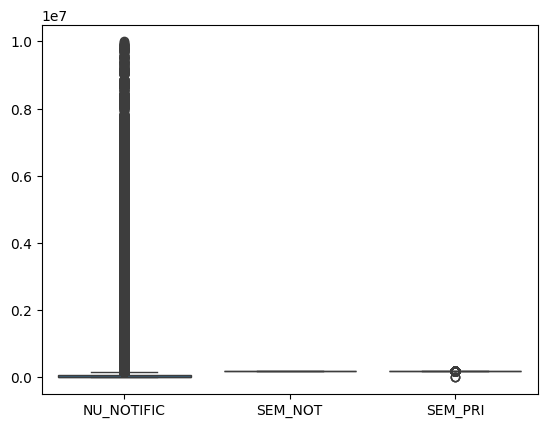

In [38]:
sns.boxplot(data=df1)
plt.show()


In [47]:
df2 = df.iloc[:, [5, 6, 7, 8, 9, 10, 11]]
df2.head()

,CS_GESTANT,CS_RACA,CS_ZONA,FEBRE,MIALGIA,CEFALEIA,EXANTEMA
0,6.0,9.0,1.0,3.0,3.0,3.0,3.0
1,6.0,4.0,1.0,3.0,3.0,3.0,3.0
2,5.0,4.0,1.0,2.0,1.0,1.0,2.0
3,6.0,1.0,1.0,3.0,3.0,3.0,3.0
4,6.0,4.0,1.0,3.0,3.0,3.0,3.0


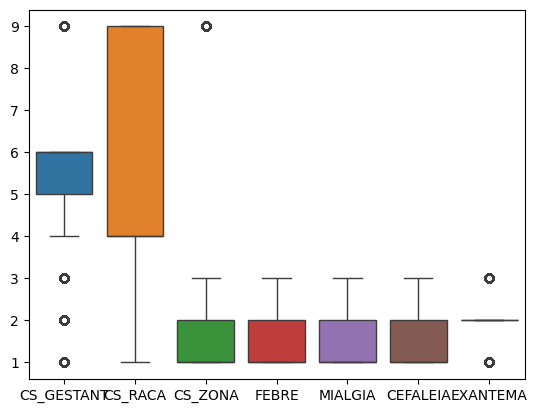

In [48]:
sns.boxplot(data=df2)
plt.show()

In [50]:
df3 = df.iloc[:, [12, 13, 14, 15, 16]]
df3.head()

,VOMITO,NAUSEA,DOR_COSTAS,CONJUNTVIT,ARTRITE
0,3.0,3.0,3.0,3.0,3.0
1,3.0,3.0,3.0,3.0,3.0
2,2.0,2.0,2.0,2.0,2.0
3,3.0,3.0,3.0,3.0,3.0
4,3.0,3.0,3.0,3.0,3.0


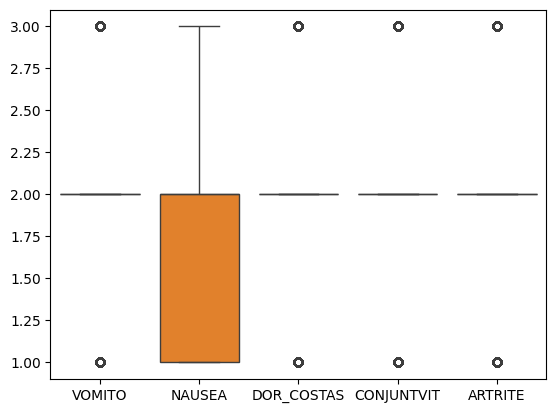

In [51]:
sns.boxplot(data=df3)
plt.show()

In [52]:
df4 = df.iloc[:, [17, 18, 19, 20, 21]]
df4.head()

,ARTRALGIA,PETEQUIA_N,LEUCOPENIA,LACO,DOR_RETRO
0,3.0,3.0,3.0,3.0,3.0
1,3.0,3.0,3.0,3.0,3.0
2,1.0,2.0,2.0,2.0,2.0
3,3.0,3.0,3.0,3.0,3.0
4,3.0,3.0,3.0,3.0,3.0


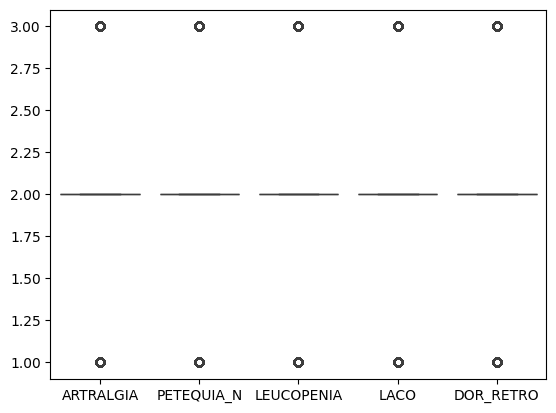

In [55]:
sns.boxplot(data=df4)
plt.show()

In [56]:
df5 = df.iloc[:, [22, 23, 24, 25, 26]]
df5.head()

,DIABETES,HEMATOLOG,HEPATOPAT,RENAL,HIPERTENSA
0,3.0,3.0,3.0,3.0,3.0
1,3.0,3.0,3.0,3.0,3.0
2,2.0,2.0,2.0,2.0,2.0
3,3.0,3.0,3.0,3.0,3.0
4,3.0,3.0,3.0,3.0,3.0


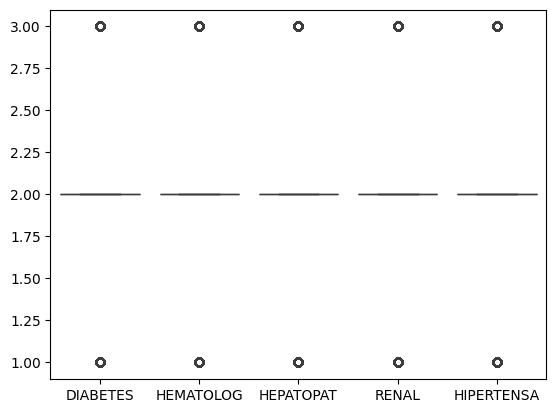

In [57]:
sns.boxplot(data=df5)
plt.show()

In [59]:
df6 = df.iloc[:, [27, 28, 29, 30, 31]]
df6.head()

,ACIDO_PEPT,AUTO_IMUNE,RESUL_SORO,RESUL_NS1,RESUL_VI_N
0,3.0,3.0,4.0,4.0,4.0
1,3.0,3.0,4.0,4.0,4.0
2,2.0,2.0,4.0,4.0,4.0
3,3.0,3.0,4.0,4.0,4.0
4,3.0,3.0,4.0,4.0,4.0


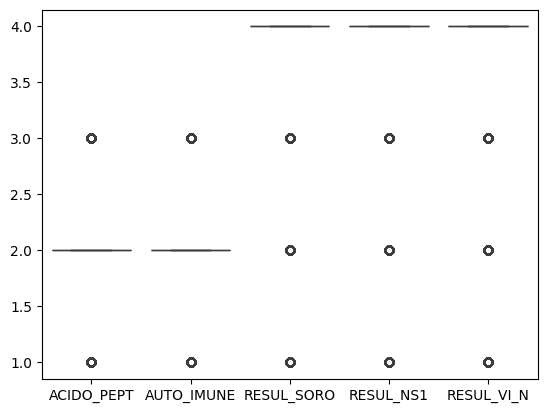

In [60]:
sns.boxplot(data=df6)
plt.show()

In [61]:
df7 = df.iloc[:, [32, 33, 34, 35, 36]]
df7.head()

,RESUL_PCR_,HISTOPA_N,IMUNOH_N,HOSPITALIZ,TPAUTOCTO
0,4.0,4.0,4.0,9.0,3.0
1,4.0,4.0,4.0,9.0,3.0
2,4.0,4.0,4.0,2.0,1.0
3,4.0,4.0,4.0,9.0,3.0
4,4.0,4.0,4.0,9.0,3.0


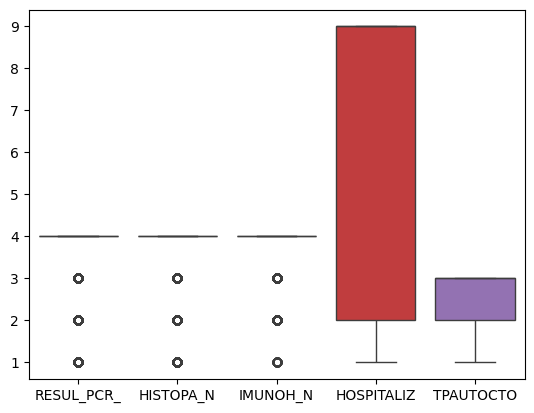

In [62]:
sns.boxplot(data=df7)
plt.show()

In [69]:
df8 = df.iloc[:, [37, 38, 39, 40, 41]]
df8.head()

,CLASSI_FIN,CRITERIO,EVOLUCAO,ALRM_HIPOT,ALRM_PLAQ
0,8.0,3.0,9.0,3.0,3.0
1,8.0,3.0,9.0,3.0,3.0
2,10.0,2.0,1.0,3.0,3.0
3,10.0,2.0,9.0,3.0,3.0
4,8.0,3.0,9.0,3.0,3.0


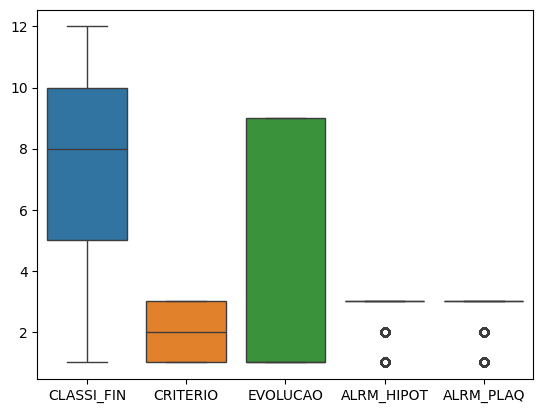

In [65]:
sns.boxplot(data=df8)
plt.show()

In [66]:
df9 = df.iloc[:, [42, 43, 44, 45, 46, 47]]
df9.head()

,ALRM_VOM,ALRM_SANG,ALRM_HEMAT,ALRM_LETAR,ALRM_HEPAT,ALRM_LIQ
0,3.0,3.0,3.0,3.0,3.0,3.0
1,3.0,3.0,3.0,3.0,3.0,3.0
2,3.0,3.0,3.0,3.0,3.0,3.0
3,3.0,3.0,3.0,3.0,3.0,3.0
4,3.0,3.0,3.0,3.0,3.0,3.0


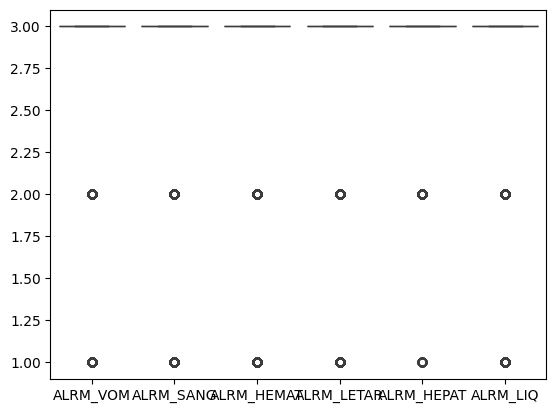

In [67]:
sns.boxplot(data=df9)
plt.show()

In [68]:
df_dengue = df
df_dengue.head()

,NU_NOTIFIC,TP_NOT,SEM_NOT,SEM_PRI,CS_SEXO,CS_GESTANT,CS_RACA,CS_ZONA,FEBRE,MIALGIA,...,CRITERIO,EVOLUCAO,ALRM_HIPOT,ALRM_PLAQ,ALRM_VOM,ALRM_SANG,ALRM_HEMAT,ALRM_LETAR,ALRM_HEPAT,ALRM_LIQ
0,158,2,201609,201609,M,6.0,9.0,1.0,3.0,3.0,...,3.0,9.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
1,298,2,201607,201607,M,6.0,4.0,1.0,3.0,3.0,...,3.0,9.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2,5082,2,201612,201612,F,5.0,4.0,1.0,2.0,1.0,...,2.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
3,111262,2,201612,201612,F,6.0,1.0,1.0,3.0,3.0,...,2.0,9.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
4,166,2,201611,201610,F,6.0,4.0,1.0,3.0,3.0,...,3.0,9.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
